## Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_curve, roc_auc_score
)

In [ ]:
glass = pd.read_csv('glass.csv')

In [ ]:
# Create household column
glass['household'] = glass.Type.map({1: 0, 2: 0, 3: 0, 5: 1, 6: 1, 7: 1})

In [ ]:
# --- PART 1: Single Feature (Al) Analysis ---
glass.sort_values(by='Al', inplace=True)
X_al = np.array(glass.Al).reshape(-1, 1)
y = glass.household

logreg_al = LogisticRegression()
logreg_al.fit(X_al, y)


LogisticRegression()

In [ ]:
# Predicted probabilities and predictions
probs_al = logreg_al.predict_proba(X_al)[:, 1]
glass['household_pred_prob'] = probs_al
pred_al = (probs_al >= 0.5).astype(int)

In [ ]:
# Evaluate default threshold
print("Single Feature: Al")
print("Accuracy:", accuracy_score(y, pred_al))
print("Precision:", precision_score(y, pred_al))
print("Recall:", recall_score(y, pred_al))


Single Feature: Al
Accuracy: 0.8691588785046729
Precision: 0.896551724137931
Recall: 0.5098039215686274


In [ ]:
# Try different thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
print("\n-- Custom Thresholds for Al --")
for t in thresholds:
    pred_custom = (probs_al >= t).astype(int)
    print(f"Threshold: {t:.1f} | Acc: {accuracy_score(y, pred_custom):.2f} | "
          f"Prec: {precision_score(y, pred_custom):.2f} | Rec: {recall_score(y, pred_custom):.2f}")


-- Custom Thresholds for Al --
Threshold: 0.1 | Acc: 0.49 | Prec: 0.31 | Rec: 0.92
Threshold: 0.2 | Acc: 0.77 | Prec: 0.51 | Rec: 0.86
Threshold: 0.3 | Acc: 0.86 | Prec: 0.72 | Rec: 0.71
Threshold: 0.4 | Acc: 0.88 | Prec: 0.82 | Rec: 0.63
Threshold: 0.5 | Acc: 0.87 | Prec: 0.90 | Rec: 0.51
Threshold: 0.6 | Acc: 0.84 | Prec: 0.87 | Rec: 0.39
Threshold: 0.7 | Acc: 0.84 | Prec: 1.00 | Rec: 0.31
Threshold: 0.8 | Acc: 0.82 | Prec: 1.00 | Rec: 0.24


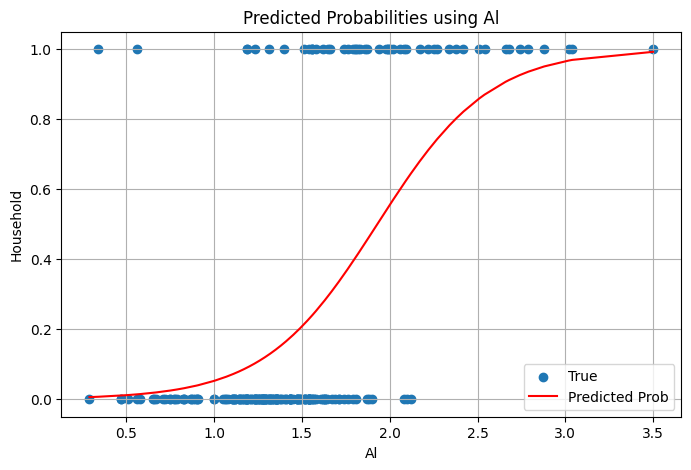

In [ ]:

# Plot predicted probabilities
plt.figure(figsize=(8, 5))
plt.scatter(glass.Al, glass.household, label='True')
plt.plot(glass.Al, probs_al, color='red', label='Predicted Prob')
plt.xlabel('Al')
plt.ylabel('Household')
plt.title('Predicted Probabilities using Al')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- PART 2: Try Other Individual Features ---
print("\n-- Individual Feature Models --")
feature_roc_data = {}  # Store ROC data for later plotting
for col in ['Al', 'Mg', 'Si', 'K', 'Ca', 'RI']:
    X_feat = glass[[col]]
    model = LogisticRegression()
    model.fit(X_feat, y)
    probs_feat = model.predict_proba(X_feat)[:, 1]
    pred_feat = (probs_feat >= 0.5).astype(int)
    acc = accuracy_score(y, pred_feat)
    prec = precision_score(y, pred_feat)
    rec = recall_score(y, pred_feat)
    print(f"{col} | Acc: {acc:.2f} | Prec: {prec:.2f} | Rec: {rec:.2f}")

    # Store ROC data
    fpr, tpr, _ = roc_curve(y, probs_feat)
    auc = roc_auc_score(y, probs_feat)
    feature_roc_data[col] = (fpr, tpr, auc)


-- Individual Feature Models --
Al | Acc: 0.87 | Prec: 0.90 | Rec: 0.51
Mg | Acc: 0.88 | Prec: 0.78 | Rec: 0.69
Si | Acc: 0.77 | Prec: 1.00 | Rec: 0.04
K | Acc: 0.76 | Prec: 0.00 | Rec: 0.00
Ca | Acc: 0.76 | Prec: 0.00 | Rec: 0.00
RI | Acc: 0.76 | Prec: 0.00 | Rec: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# --- PART 3: Logistic Regression on All Features ---
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X = glass[features]
y = glass['household']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_all = LogisticRegression()
logreg_all.fit(X_train_scaled, y_train)
probs_all = logreg_all.predict_proba(X_test_scaled)[:, 1]
pred_all = (probs_all >= 0.5).astype(int)

print("\n-- Logistic Regression on All Features --")
print("Accuracy:", accuracy_score(y_test, pred_all))
print("Precision:", precision_score(y_test, pred_all))
print("Recall:", recall_score(y_test, pred_all))


-- Logistic Regression on All Features --
Accuracy: 0.9444444444444444
Precision: 0.8571428571428571
Recall: 0.9230769230769231


In [ ]:
# ROC for full model
fpr_all, tpr_all, _ = roc_curve(y_test, probs_all)
auc_all = roc_auc_score(y_test, probs_all)
feature_roc_data['All Features'] = (fpr_all, tpr_all, auc_all)

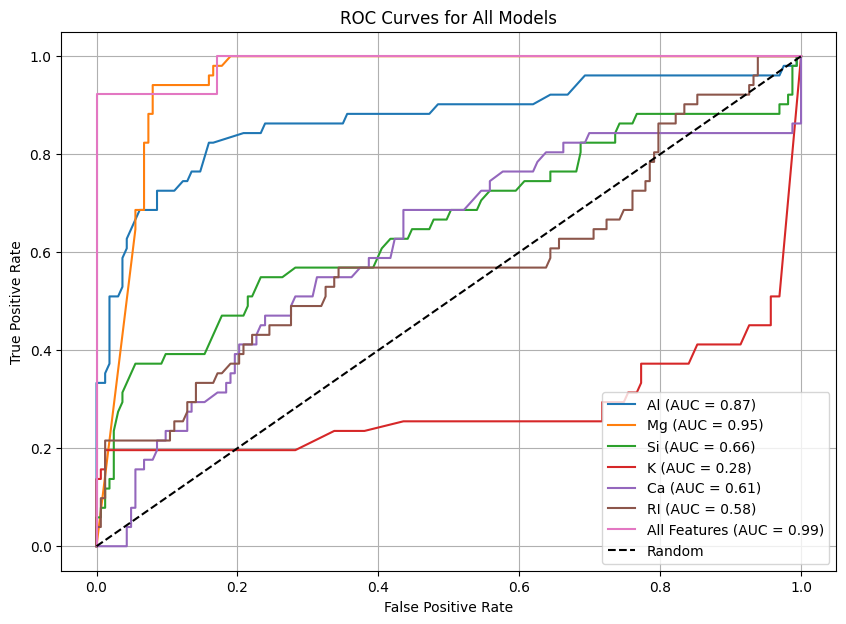

In [ ]:
# --- PART 4: Plot ROC Curves for Each Model ---
plt.figure(figsize=(10, 7))
for feature, (fpr, tpr, auc) in feature_roc_data.items():
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()

## Clustering - Iris dataset

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import cluster, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
# Load Dataset
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Features only
cols = df.columns[:-1]

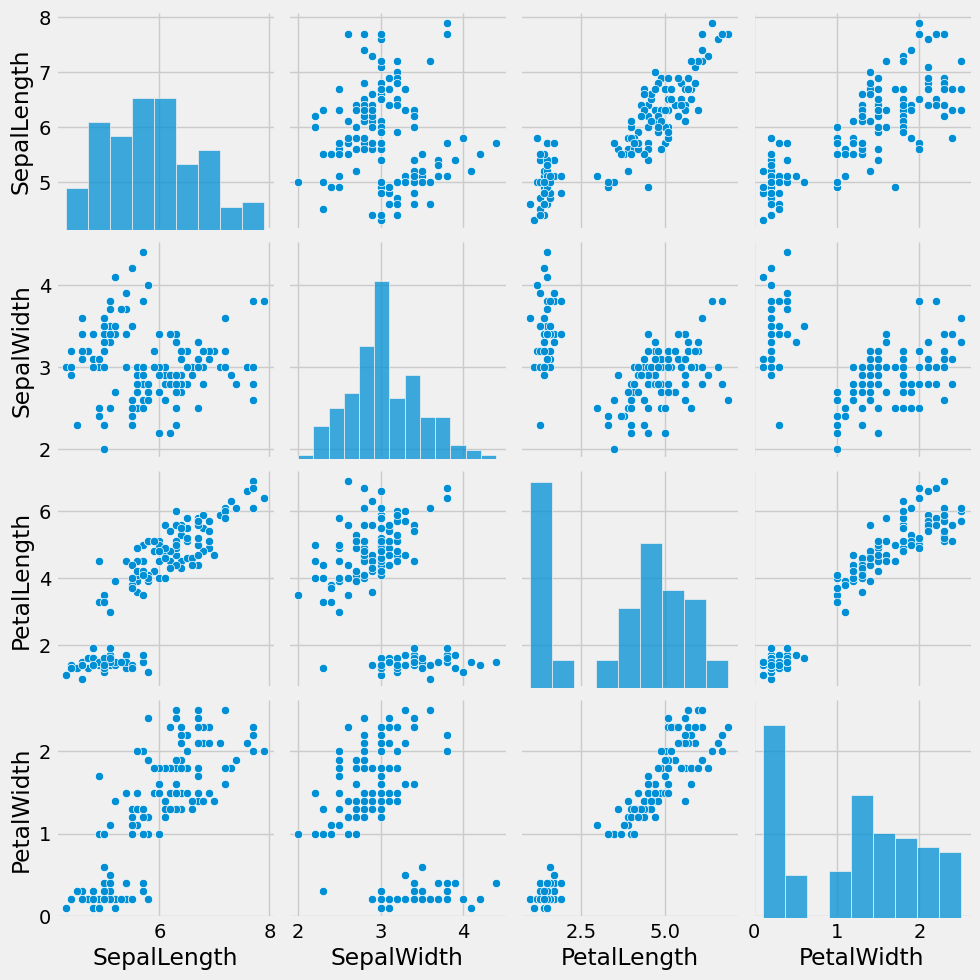

In [ ]:
# Pairplot without labels
sns.pairplot(df[cols])

In [ ]:
# Preprocessing (MinMax Scaling)
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
scaled_df = pd.DataFrame(X_scaled, columns=cols)

In [ ]:
# KMeans for k=2
k = 2
kmeans = cluster.KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette = metrics.silhouette_score(X_scaled, labels)

print(f"Labels: {labels}\nCentroids:\n{centroids}")
print(f"Silhouette Score: {silhouette:.4f}")

Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Centroids:
[[0.545      0.36333333 0.6620339  0.65666667]
 [0.19611111 0.59083333 0.07864407 0.06      ]]
Silhouette Score: 0.6295


In [ ]:
# Add cluster labels to dataframe
df['label'] = labels
print(df.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name  label
0          5.1         3.5          1.4         0.2  Iris-setosa      1
1          4.9         3.0          1.4         0.2  Iris-setosa      1
2          4.7         3.2          1.3         0.2  Iris-setosa      1
3          4.6         3.1          1.5         0.2  Iris-setosa      1
4          5.0         3.6          1.4         0.2  Iris-setosa      1


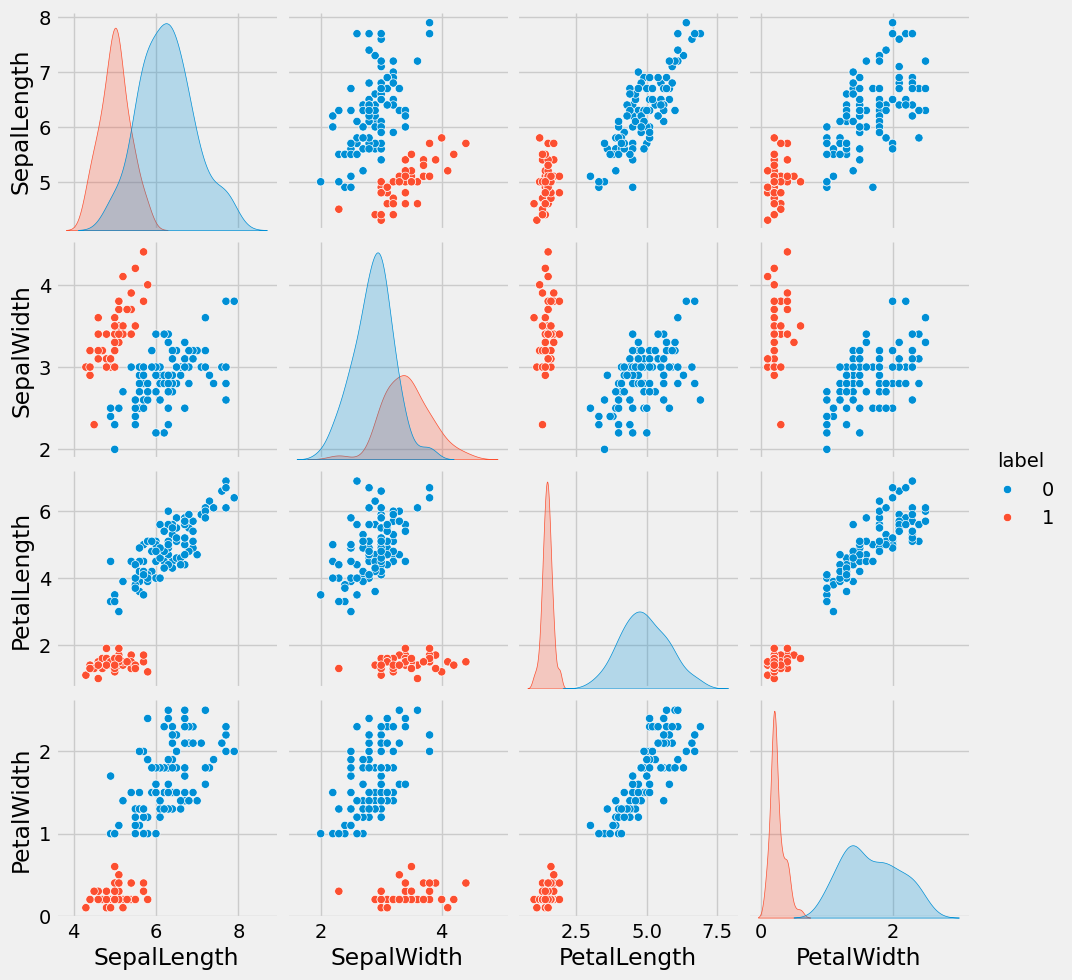

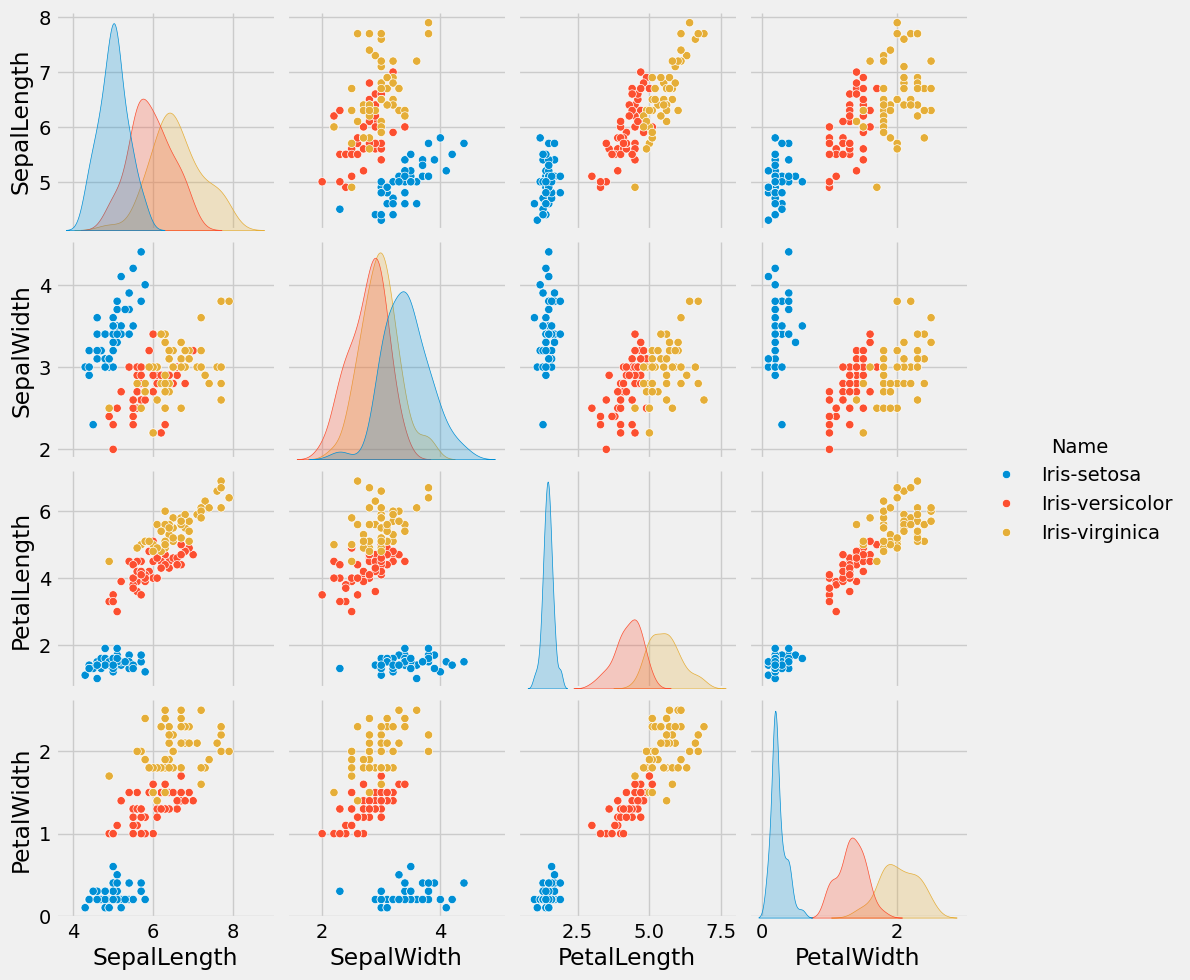

In [ ]:
# Cluster Visualization
sns.pairplot(df, vars=cols, hue='label')
sns.pairplot(df, vars=cols, hue='Name')  # Actual labels

In [ ]:
# Silhouette Scores for k = 2 to 10
score = []
inertia_score = []
K_range = range(2, 11)
for k in K_range:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score.append(metrics.silhouette_score(X_scaled, labels))
    inertia_score.append(kmeans.inertia_)

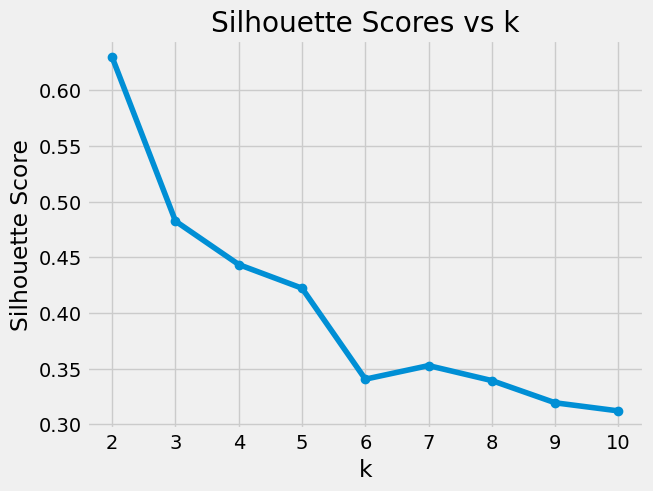

In [ ]:
# Plot Silhouette Scores
plt.figure()
plt.plot(K_range, score, marker='o')
plt.title('Silhouette Scores vs k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid(True)

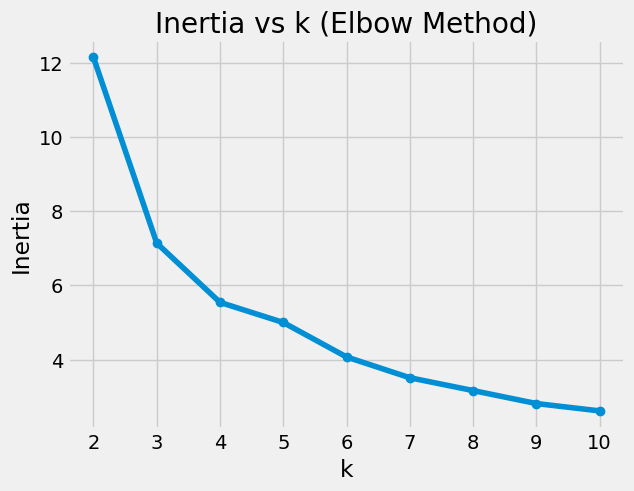

In [ ]:
# Plot Inertia (Elbow Method)
plt.figure()
plt.plot(K_range, inertia_score, marker='o')
plt.title('Inertia vs k (Elbow Method)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)

1. How do inertia and silhouette scores change as k increases?
As the number of clusters k increases, inertia (i.e., within-cluster sum of squares) consistently decreases. This is expected, since adding more clusters reduces the distance between data points and their respective centroids. The Elbow plot reveals a steep drop in inertia up to around k = 3, after which the rate of decrease slows—indicating diminishing returns.
On the other hand, the silhouette score—which assesses how well points fit within their clusters compared to others—peaks at k = 2 (~0.62). As k increases, the score gradually declines, suggesting that cluster quality deteriorates as clusters become less well-separated.
Taken together, k = 2 or k = 3 appear to be the most appropriate choices, offering a good balance between compactness (inertia) and separation (silhouette score).

2. What happens if you don’t scale your features?
Without feature scaling, variables with larger numeric ranges—like PetalLength (~1–6 cm)—can dominate distance calculations over those with smaller ranges—like SepalWidth (~2–4 cm). Since KMeans relies on Euclidean distances, this imbalance skews the clustering process, potentially distorting the true structure and leading to biased or misleading clusters.

3. Is there a ‘right’ value for k? Why or why not?
There is no universally "correct" k—it depends on the dataset and the goals of the analysis. For example, in the Iris dataset, where the true number of species is known to be 3, choosing k = 3 is both intuitive and interpretable.
That said, tools like the Elbow method and silhouette analysis can help identify values of k that balance compactness and separation. Still, selecting k also benefits from domain expertise, as clustering in real-world scenarios often requires alignment with business or scientific objectives.
In this case, k = 3 aligns with both the known classes and the behavior of the evaluation metrics, making it a reasonable and justifiable choice. However, since clustering is an unsupervised technique, it rarely yields a single definitive answer—contextual validation remains essential.

## Clustering - Food Nutrients dataset


In [ ]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import cluster, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
# Load Dataset
df = pd.read_csv("food_dataset.csv")
print(df['Category'].value_counts())  # Assuming 'Category' as a categorical column
df.head()

Category
BEEF                457
PORK                304
CEREALS RTE         291
BABYFOOD            221
No Category         198
                   ... 
LUNCHEON SLICES       1
FISH STICKS           1
SOUR CRM              1
CREAM SUBSTITUTE      1
SOUR DRSNG            1
Name: count, Length: 1183, dtype: int64


,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [ ]:
# Features only (exclude non-numeric columns)
cols = df.select_dtypes(include=[np.number]).columns

In [ ]:
# Preprocessing (MinMax Scaling)
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
scaled_df = pd.DataFrame(X_scaled, columns=cols)

In [ ]:
# KMeans for k=2
k = 2
kmeans = cluster.KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette = metrics.silhouette_score(X_scaled, labels)

print(f"Labels: {labels}\nCentroids:\n{centroids}")
print(f"Silhouette Score: {silhouette:.4f}")

Labels: [1 1 1 ... 0 0 0]
Centroids:
[[0.13667042 0.0016062  0.01453169 0.00395151 0.00098334 0.08321459
  0.01477045 0.0159133  0.01185298 0.15401389 0.00363435 0.00244099
  0.0009263  0.02655249 0.01212711 0.12783744 0.07608918 0.00221848
  0.0117466  0.00653793 0.02373953 0.00687382 0.72235208 0.02896976
  0.01214917 0.02407295 0.06555855 0.01940668 0.02036057 0.00616778
  0.00862117 0.01227266 0.02450437 0.01225416 0.01322235 0.00709639
  0.00898183 0.00729003 0.00289745 0.01316461 0.01519317 0.00299112
  0.00187495 0.00489831]
 [0.15471805 0.001178   0.0291761  0.00306694 0.00143545 0.57246975
  0.00465955 0.01221111 0.06046165 0.47926666 0.00213375 0.00118634
  0.00894864 0.05511565 0.02068179 0.10805876 0.00929557 0.00373003
  0.03132223 0.00605826 0.1701835  0.0220924  0.10217691 0.08748455
  0.06319182 0.06024355 0.19872441 0.00738614 0.0061507  0.0203434
  0.02144948 0.05020183 0.09114007 0.02289237 0.02427344 0.01239824
  0.01386272 0.00869143 0.00441319 0.00842638 0.0416077

In [ ]:
# Add cluster labels to dataframe
df['label'] = labels
print(df.head())

     Category               Description  Nutrient Data Bank Number  \
0      BUTTER          BUTTER,WITH SALT                       1001   
1      BUTTER  BUTTER,WHIPPED,WITH SALT                       1002   
2  BUTTER OIL      BUTTER OIL,ANHYDROUS                       1003   
3      CHEESE               CHEESE,BLUE                       1004   
4      CHEESE              CHEESE,BRICK                       1005   

   Data.Alpha Carotene  Data.Ash  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
0                    0      2.11                 158                        0   
1                    0      2.11                 158                        0   
2                    0      0.00                 193                        0   
3                    0      5.11                  74                        0   
4                    0      3.18                  76                        0   

   Data.Carbohydrate  Data.Cholesterol  Data.Choline  ...  \
0               0.06           

In [ ]:
# Silhouette Scores for k = 2 to 10
score = []
inertia_score = []
K_range = range(2, 11)
for k in K_range:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score.append(metrics.silhouette_score(X_scaled, labels))
    inertia_score.append(kmeans.inertia_)

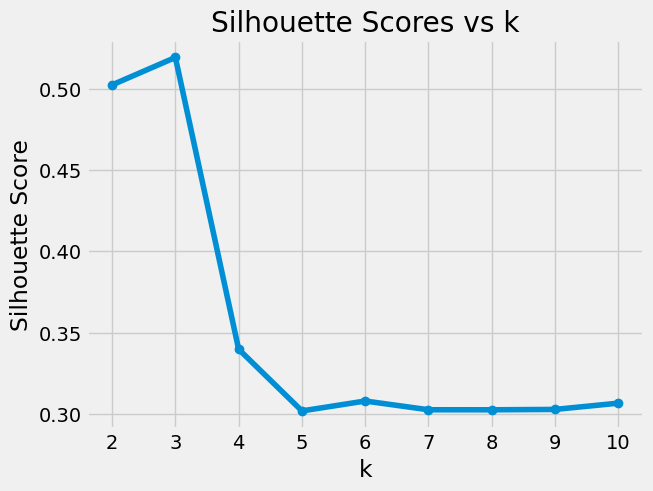

In [ ]:
# Plot Silhouette Scores
plt.figure()
plt.plot(K_range, score, marker='o')
plt.title('Silhouette Scores vs k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid(True)

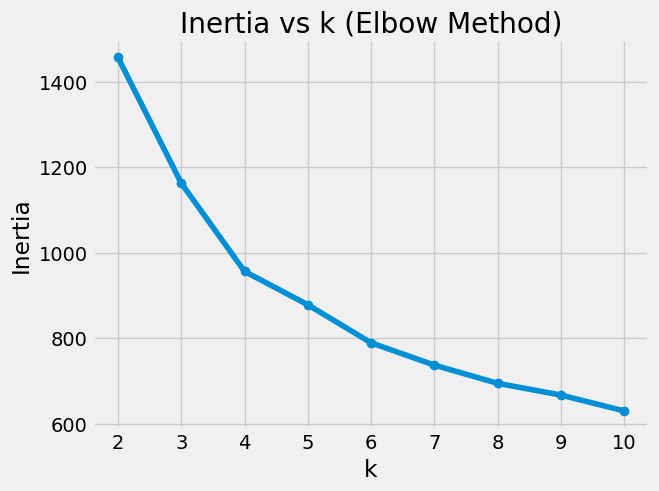

In [ ]:
# Plot Inertia (Elbow Method)
plt.figure()
plt.plot(K_range, inertia_score, marker='o')
plt.title('Inertia vs k (Elbow Method)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)

1. How do the inertia and silhouette scores change?

a. Inertia (Second Plot):
As the number of clusters (k) increases, inertia consistently decreases. This is expected because more clusters generally lead to smaller distances between data points and their respective cluster centers. However, the rate of improvement slows down after a certain point — particularly between k=4 and k=6 — where the "elbow" effect becomes noticeable, signaling diminishing returns from adding more clusters.

b. Silhouette Score (First Plot):
The silhouette score reaches its highest value at k=3, suggesting this is the most optimal cluster count in terms of internal cohesion and separation from other clusters. Beyond k=3, the score drops noticeably and then levels off, implying that increasing the number of clusters beyond this point doesn't significantly enhance cluster quality.

2. What if you don't scale your features?

If feature scaling is skipped:

a. Metrics like inertia and silhouette scores can become unreliable, as features with larger value ranges disproportionately influence the distance calculations.

b. This often leads to distorted or imbalanced clusters, where the algorithm captures variance due to feature scale rather than actual data structure.

c. As a result, the values of k suggested by these metrics may shift or become less meaningful, potentially leading to suboptimal clustering outcomes.

3. Is there a 'right' k? Why or why not?
There’s no single "correct" value for k that fits all situations. The optimal number of clusters is highly dependent on the dataset's nature, the problem context, and the intended use of the clusters.

In this case, k = 3 appears to be a strong candidate:

The silhouette score peaks at k = 3, suggesting good cluster cohesion and separation.

The inertia plot shows a noticeable "elbow" at k = 3, where further increases in k lead to smaller gains in compactness.

However, selecting the best k often involves more than just metrics. Domain knowledge, visualization tools like PCA or t-SNE, and practical considerations like interpretability or application-specific needs should also guide the choice.